## Automatic Document Clustering
The goal in this task is to perform clustering on the documents and compare the clusters to the actual categories.

### Data Set Description
For this task we will use a subset of the 20 Newsgroup data set. The subset for this task includes 2,500 documents (newsgroup posts), each belonging to one of 5 categories windows (0), crypt (1), christian (2), hockey (3), forsale (4). The documents are represented by 9328 terms (stems). The dictionary (vocabulary) for the data set is given in the file "terms.txt" and the full term-by-document matrix is given in "matrix.txt" (comma separated values). The actual category labels for the documents are provided in the file "classes.txt". 

In [99]:
import numpy as np
import pandas as pd

### A. Create the distance function that, instead of using Euclidean distance, uses Cosine similarity. This is the distance function we  will use to pass to the kMeans function.

In [4]:
def distCosine(vecA, vecB):
    a=linalg.norm(vecA)
    b=linalg.norm(vecB)   
    return 1-(dot(vecA,vecB)/(a*b))

### B. Data Preprocessing 
1. Load the data set 
2. Split the data set. (the 80% segment is going to be used for clustering in the next part)

*Note: the data matrix provided has terms as rows and documents as columns. Since we want to cluster documents, we'll need to take the transpose of this matrix so that the main data matrix is a document x term matrix. 

In [5]:
matrix_td=pd.read_csv("C:/Users/Rai Chiang/Desktop/478 data/assignment3/clustering/matrix.txt")
matrix_dt=np.array(matrix_td.T)


classes=np.genfromtxt("C:/Users/Rai Chiang/Desktop/478 data/assignment3/clustering/classes.txt",dtype=(None),delimiter='\t',skip_header=1)
classes1=[]
for c in classes:
    classes1.append(c.split(" "))
class_lb=(np.array(classes1).astype(int).T)[1] #1d array

from sklearn.cross_validation import train_test_split
training_dt,testing_dt,training_class_lb,testing_class_lb=train_test_split(matrix_dt,class_lb,train_size=0.8,random_state=7)

C:\Anacon\envs\py27\lib\site-packages\ipykernel\__main__.py:5: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
C:\Anacon\envs\py27\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


### C. Perform Kmeans clustering on the training data.
1. Write a function to display the top N terms in each cluster along with the cluster DF values for each term and the size of the cluster. 
2. The cluster DF value for a term t in a cluster C is the percentage of docs in cluster C in which term t appears (so, if a cluster has 500 documents, and term "game" appears in 100 of those 500 documents, then DF value of "game" in that cluster is 0.2 or 20%). 
3. Sort the terms for each cluster in decreasing order of the DF percentage. 

In [6]:
import kMeans
reload (kMeans)

terms=pd.read_csv("C:/Users/Rai Chiang/Desktop/478 data/assignment3/clustering/terms.txt")
terms=np.array(terms.T)

In [2090]:
def cluster_results(data,term,cluster,topWord):
    
    centroid,clusters=kMeans.kMeans(data,cluster,kMeans.distCosine,kMeans.randCent)

    dic={}
    cluster_label=np.unique(clusters.T[0]).tolist()   
    for i in cluster_label:                  
        doc=len(data[clusters.T[0]==i])                 
        #find len(doc) that belongs to the same cluster 
        
        tf=data[clusters.T[0]==i].sum(axis=0)           
        #The Doc frequency for terms (for a term T, #of doc that contains T)
        
        dic[i]=((tf.astype(float))/float(doc))          
        #use dictionary to store an array of DF values for each cluster 
        
    
        cluster_df_list=dic[i].tolist()                 
        #the Doc frequency list for cluster i

        d_order=sorted(enumerate(cluster_df_list),key=lambda x:x[1],reverse=True)  
        #get the index and sort by decreasing order of Doc frequency
        
        d_order_index=np.array(d_order).T[0]
        d_order_index=d_order_index.astype(int).tolist()
         

        
        print "\n\nCuster%i" %(i)
        print "\n-The size of the cluster%i:" %(i),doc
        print "\n-Top %.0f words in cluster%i:" %(topWord,i)
          
        for top in d_order_index[:topWord]:                
            #find the corresponding term according to the index
            print term.reshape(-1).tolist()[top]

        print "\n-The DF value for Top %.0f words in cluster%i:" %(topWord,i)
        for df in range(topWord):
            print dic[i][d_order_index][df]                
            #make sure the df value is also in decreasing order
   

In [2091]:
cluster_results(training_dt,terms,cluster=3,topWord=5)



Custer0

-The size of the cluster0: 785

-Top 5 words in cluster0:
subject
game
team
plai
on

-The DF value for Top 5 words in cluster0:
1.0356687898089172
0.9630573248407643
0.6038216560509554
0.5898089171974522
0.46496815286624205


Custer1

-The size of the cluster1: 1208

-Top 5 words in cluster1:
subject
on
god
write
window

-The DF value for Top 5 words in cluster1:
1.1051324503311257
0.9834437086092715
0.8683774834437086
0.7864238410596026
0.7144039735099338


Custer2

-The size of the cluster2: 7

-Top 5 words in cluster2:
ax
max
pl
giz
bxn

-The DF value for Top 5 words in cluster2:
7199.857142857143
517.5714285714286
60.0
32.0
21.428571428571427


In [63]:
# using the syntex from the fuction above, create a function to generate word cloud

centroid1,cluster1=kMeans.kMeans(training_dt,3,kMeans.distCosine,kMeans.randCent)
cluster_label=np.unique(cluster1.T[0]).tolist()   
np.unique(cluster_label)

array([0., 1., 2.])

In [80]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

def word_cloud(tf):
    lst_term=terms.reshape(-1).tolist()
    tf=dict(zip(lst_term,tf))           
    #concatanate array and list and trasform them into dictionary 
            
    wordcloud = WordCloud()
    wordcloud.generate_from_frequencies(frequencies=tf)    
    #frequency onlys take dictionary format
    
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

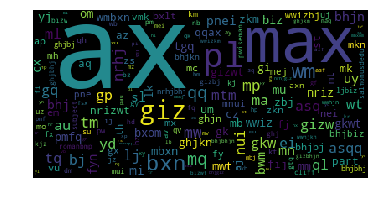

In [81]:
tf0=training_dt[cluster1.T[0]==0].sum(axis=0)
tf1=training_dt[cluster1.T[0]==1].sum(axis=0)
tf2=training_dt[cluster1.T[0]==2].sum(axis=0)

word_cloud(tf0)

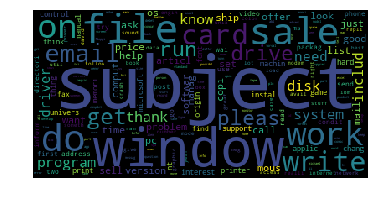

In [82]:
word_cloud(tf1)

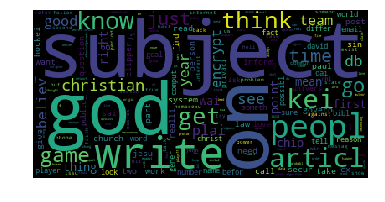

In [83]:
word_cloud(tf2)

### 4. Use the cluster assignments from Kmeans clustering, compare the 5 clusters to the 5 pre-assigned classes by computing the Completeness and Homogeneity values.

In [2065]:
from sklearn.metrics import completeness_score, homogeneity_score

centroid,clusters=kMeans.kMeans(training_dt,5,kMeans.distCosine,kMeans.randCent)
clusters=np.array([clusters.T[0].astype(int)]).T.reshape(-1)

print "completeness_score: ", completeness_score(training_class_lb,clusters)
print "homogeneity_score", homogeneity_score(training_class_lb,clusters)


completeness_score:  0.7657107056392192
homogeneity_score 0.25074598986758634
